In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
from chessbot import model
import numpy as np

trainer = Trainer()
board = chess.Board()
chessbot = ChessBot()

Using TensorFlow backend.


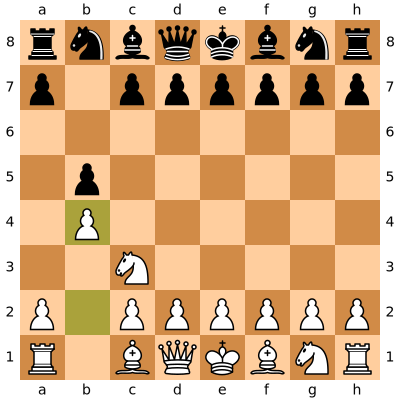

In [7]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(chessbot.best_move(board))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(chessbot.best_move(board))

board

In [7]:
print(chessbot.best_move(board, depth=1))

e7d7


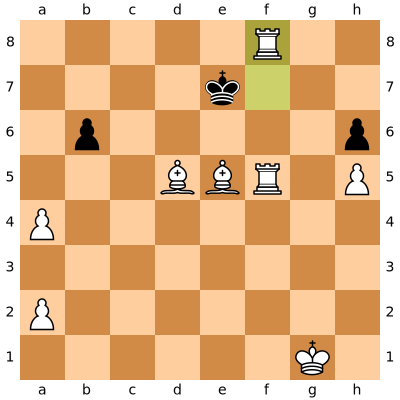

In [6]:
board

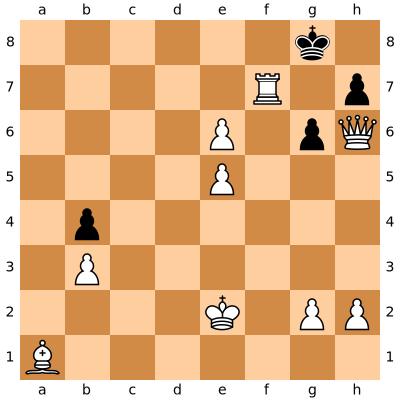

In [3]:
board.set_fen('6k1/5R1p/4P1pQ/4P3/1p6/1P6/4K1PP/B7 w - - 15 48')
board

In [4]:
chessbot.best_move(board)

a1b2 1
a1c3 1
a1d4 1
e2d1 1
e2e1 1
e2f1 1
e2d2 1
e2f2 1
e2d3 1
e2e3 1
e2f3 1
h6c1 1
h6d2 1
h6e3 0.692266106606
h6h3 0.602216660976
h6f4 0.679177880287
h6h4 1
h6g5 1
h6h5 0.612906813622
h6g6 0.655970990658
h6g7 2
h6h7 2
h6f8 2
f7f1 1
f7f2 1
f7f3 1
f7f4 1
f7f5 0.661066412926
f7f6 1
f7a7 1
f7b7 1
f7c7 1
f7d7 1
f7e7 1
f7g7 0.747065961361
f7h7 1
f7f8 2
g2g3 1
h2h3 1
e6e7 0.668849349022
g2g4 1
h2h4 1


Move.from_uci('h6g7')

In [3]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(chessbot.best_move(board))
        #board.push(trainer.best_move(board, filter=True))
    else:
        board.push(trainer.best_move(board, filter=True))
        #board.push(chessbot.best_move(board))
print(board.result(), len(board.move_stack))

0.307213664055 b2b4
0.383862912655 g2g4
0.387655079365 c1a3
0.38806951046 b1c3
0.412610948086 d1c1
0.408021748066 a1b1
0.410083651543 e1d1
0.416282773018 f1h3
0.415082931519 c1b2
0.425122797489 g1h3
0.44825142622 c3d5
0.493553519249 d5e7
0.539814442396 b2a1
0.484451711178 e7c8
0.476978778839 a1c3
0.466970801353 h1f1
0.47052282095 c3e3
0.533553421497 c2c4
0.656247138977 d1c1
0.695570707321 f1e1
0.507902234793 d2d4
0.594563633204 f2f4
0.561976760626 c1c2
0.561976760626 d4e5
0.611976116896 e3c3
0.640153229237 b1d1
0.611976116896 d1b1
0.640153229237 b1d1
0.611976116896 d1b1
0.627905398607 c2c1
0.649122625589 c1d1
0.629109114408 d1c2
0.640641629696 b1c1
0.659346759319 b4b5
0.595338374376 a3b4
0.636589378119 b4f8
0.64666312933 c3b4
0.67239266634 e1h1
0.703304111958 c2d3
0.656726032495 d3d2
0.745820760727 c1a1
0.672905653715 d2e1
0.547860085964 b5c6
0.548387229443 b4b5
0.501981496811 e2e4
0.509034901857 a1d1
0.538191616535 d1d4
1 d4d7
3 b5c6
1-0 97


In [4]:
board.reset()

In [4]:
print(trainer.test_winrate())

0.307213664055 b2b4
0.380905747414 b1c3
0.443226635456 c3d5
0.410638928413 e2e3
0.607434004545 c2c4
0.411491036415 h2h3
0.493035495281 d2d3
0.438416838646 g2g3
0.386079967022 c1a3
0.449384331703 f1e2
0.472164273262 d1a4
0.472035586834 a3c1
0.420866250992 e1f1
0.47770345211 c1a3
0.385255932808 f2f4
0.448199808598 e2d1
0.48087978363 f1e2
0.456650972366 c4c5
0.342731058598 e2f3
0.401246190071 f4e5
0.390589118004 e5e6
0.372126162052 g1e2
0.382726371288 e2f4
0.380978226662 h1b1
0.323704183102 f3g2
0.328642606735 g2h2
0.312074124813 h2h1
-1 h1g1
0.184746265411 c7c5
0.705629348755 b8c6
0.73012766242 g8h6
0.759221673012 g7g6
0.633243322372 d7d6
0.790860280395 e7e6
0.751195162535 f8g7
0.848995760083 c8d7
0.616432338953 c6d4
0.620995432138 g6g5
0.392709493637 d8a5
0.399245977402 f7e6
0.461434960365 g7e5
0.342365920544 a8c8
0.448373496532 h8g8
0.353694021702 e8e7
0.375747084618 g8g6
0.285457611084 g6g7
0.259707510471 d7f5
0.428008258343 g7g5
0.367579460144 b7b6
0.352880597115 a7a5
0.309293568134 

In [2]:
import chess
from trainer import Trainer

trainer = Trainer()

Using TensorFlow backend.


In [5]:
board, won = trainer.play_vs_sunfish(eval=True)

In [6]:
print(won)

False


In [4]:
temp_board = chess.Board()
move_num = 0

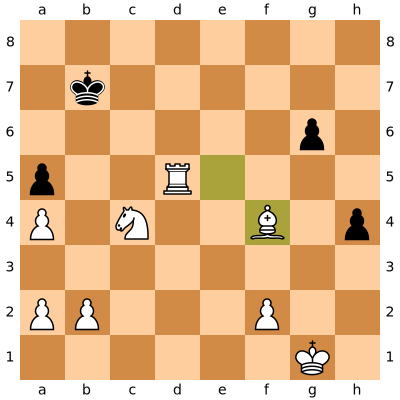

In [81]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [5]:
file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")

In [6]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [7]:
game.headers['Result']

'0-1'

In [8]:
trainer.train_from_match(board, game.headers['Result'])

[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


In [1]:
cd src

D:\Python\chess\src


In [2]:
from model_conv import model

Using TensorFlow backend.


(None, 16512)


In [4]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R g8f6
b8a6 0.0133013
b8c6 0.40795
g8f6 0.888065
g8h6 0.00202515
a7a6 0.0281349
b7b6 0.116471
c7c6 0.521006
d7d6 0.245224
e7e6 0.708937
f7f6 0.0284529
g7g6 0.501267
h7h6 0.0246119
a7a5 0.00417683
b7b5 0.00596638
c7c5 0.621416
d7d5 0.390517
e7e5 0.850337
f7f5 0.198029
g7g5 0.00757094
h7h5 0.0163715
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R


In [22]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

1/1 [==============================] - 0s


array([[ 0.09595465,  0.90404534]], dtype=float32)